<a href="https://colab.research.google.com/github/tota1/tota1/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#uploading data
data =pd.read_csv("/content/50_Startups.csv")

In [6]:
#displying the first few rows of the dataset
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
# displying the shape of the dataset
data.shape

(50, 5)

In [8]:
#displying descriptive statics of the dataset
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
# checking missing values in the dataset
data.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [10]:
#checking for duplicative values in the dataset
data.duplicated().sum()

0

In [11]:
#displaying information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


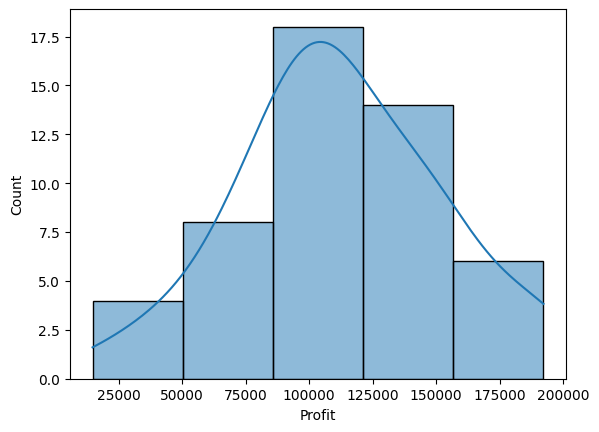

In [12]:
#plotting a histogram with KDE for the "profit" column
sns.histplot(data['Profit'], bins=5, kde=True)
plt.show()

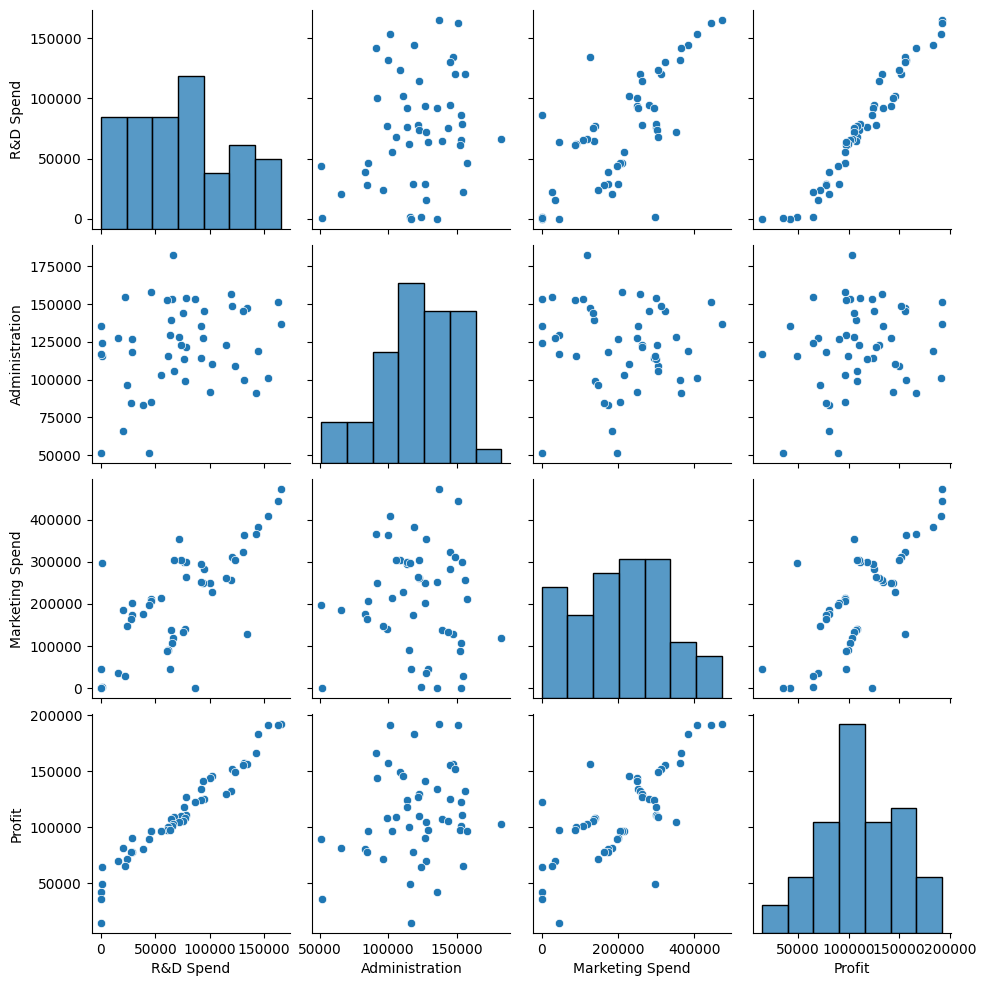

In [13]:
sns.pairplot(data)
plt.show()

In [14]:
#preparing data
x=data[["R&D Spend","Administration","Marketing Spend"]] #fetures
y=data["Profit"]                                         #target

In [15]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [17]:
#making predictions
y_pred = model.predict(x_test)

In [22]:
#creating a DataFrame with the predicted profits
data =pd.DataFrame(data={"predicted profit": y_pred.flatten()})
print(data.head())

   predicted profit
0     125972.148263
1      85471.922710
2      98924.151683
3      46639.786287
4     128142.124732


In [24]:
#Evaluating the model
testing_data_model_score = model.score(x_test, y_test)
print("Testing Data Score:", testing_data_model_score)

testing_data_model_score = model.score(x_train, y_train)
print("Training Data Score:", testing_data_model_score)

Testing Data Score: 0.9418819530700165
Training Data Score: 0.9508557563847193


In [26]:
#comparing predicted values with actual values
df = pd.DataFrame(data={"predicted value": y_pred, "Actual Value": y_test})
df

,predicted value,Actual Value
13,125972.148263,134307.35
39,85471.922710,81005.76
30,98924.151683,99937.59
45,46639.786287,64926.08
17,128142.124732,125370.37
48,52602.190537,35673.41
26,108364.697602,105733.54
25,100331.588469,107404.34
32,97538.566747,97427.84
19,112496.703984,122776.86


In [27]:
#Evaluate the model using Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is:", mse * 100)

Mean Squared Error is: 8177214943.547145


In [29]:
# Evaluate the model using Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error is:", rmse * 100)

Root Mean Squared Error is: 904279.5443637517
